<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.027212,172.604595,281.631807,-98.024028,379.655835
1,0.0,1.0,86.788515,-843.691828,-746.903313,-57.933264,-688.970049
2,0.0,2.0,83.048382,670.523293,763.571674,-45.681568,809.253242
3,0.0,3.0,79.170644,-617.822815,-528.652171,-32.979116,-495.673055
4,0.0,4.0,56.314747,308.610592,374.925339,41.890816,333.034523
...,...,...,...,...,...,...,...
119995,999.0,115.0,61.000274,19.362530,90.362804,174.502318,-84.139513
119996,999.0,116.0,62.813922,1866.617485,1939.431407,188.440888,1750.990519
119997,999.0,117.0,35.773030,-199.083178,-153.310148,-19.378643,-133.931505
119998,999.0,118.0,87.227960,290.316114,387.544074,376.072051,11.472023


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.027212,172.604595,281.631807,-98.024028,379.655835
1,0.0,1.0,86.788515,-843.691828,-746.903313,-57.933264,-688.970049
2,0.0,2.0,83.048382,670.523293,763.571674,-45.681568,809.253242
3,0.0,3.0,79.170644,-617.822815,-528.652171,-32.979116,-495.673055
4,0.0,4.0,56.314747,308.610592,374.925339,41.890816,333.034523
...,...,...,...,...,...,...,...
119995,999.0,115.0,61.000274,19.362530,90.362804,174.502318,-84.139513
119996,999.0,116.0,62.813922,1866.617485,1939.431407,188.440888,1750.990519
119997,999.0,117.0,35.773030,-199.083178,-153.310148,-19.378643,-133.931505
119998,999.0,118.0,87.227960,290.316114,387.544074,376.072051,11.472023


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,99.027212,172.604595,281.631807,-98.024028,379.655835
1,0.0,1.0,86.788515,-843.691828,-746.903313,-57.933264,-688.970049
2,0.0,2.0,83.048382,670.523293,763.571674,-45.681568,809.253242
3,0.0,3.0,79.170644,-617.822815,-528.652171,-32.979116,-495.673055
4,0.0,4.0,56.314747,308.610592,374.925339,41.890816,333.034523
...,...,...,...,...,...,...,...
119995,999.0,115.0,61.000274,19.362530,90.362804,174.502318,-84.139513
119996,999.0,116.0,62.813922,1866.617485,1939.431407,188.440888,1750.990519
119997,999.0,117.0,35.773030,-199.083178,-153.310148,-19.378643,-133.931505
119998,999.0,118.0,87.227960,290.316114,387.544074,376.072051,11.472023


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    99.027212   172.604595   281.631807  -98.024028   379.655835
      1.0    86.788515  -843.691828  -746.903313  -57.933264  -688.970049
      2.0    83.048382   670.523293   763.571674  -45.681568   809.253242
      3.0    79.170644  -617.822815  -528.652171  -32.979116  -495.673055
      4.0    56.314747   308.610592   374.925339   41.890816   333.034523
...                ...          ...          ...         ...          ...
999.0 115.0  61.000274    19.362530    90.362804  174.502318   -84.139513
      116.0  62.813922  1866.617485  1939.431407  188.440888  1750.990519
      117.0  35.773030  -199.083178  -153.310148  -19.378643  -133.931505
      118.0  87.227960   290.316114   387.544074  376.072051    11.472023
      119.0  49.992154  -724.920642  -664.928487   89.900731  -754.829218

[120000 rows x 5 columns]

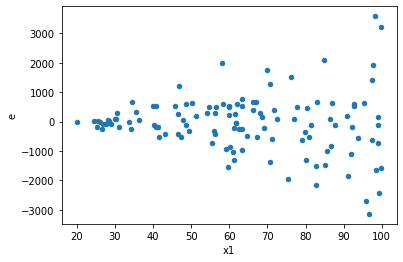

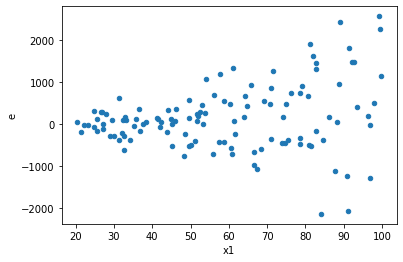

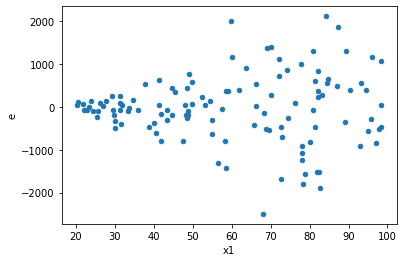

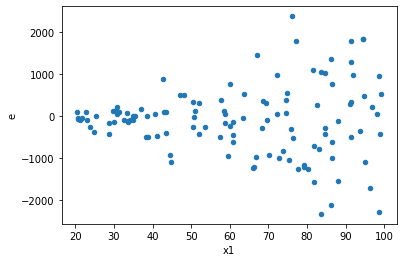

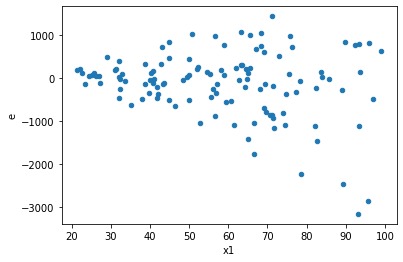

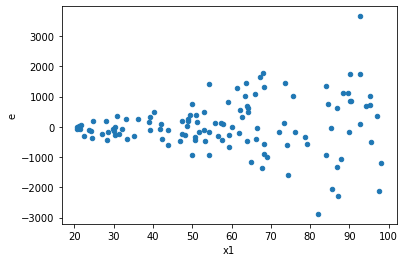

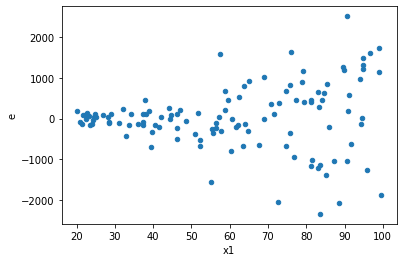

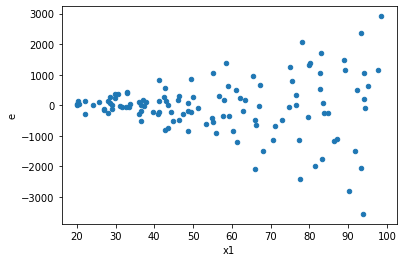

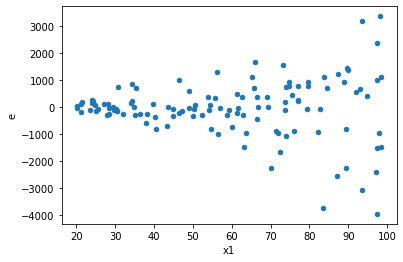

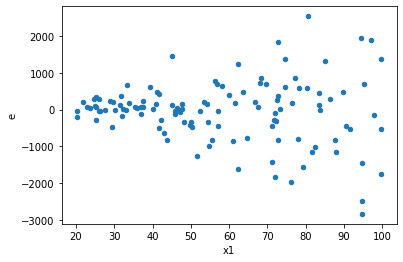

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,47.0,47.0,4036501.025369049,54135153.718501434,85883.000539767,1151811.7812447113,13.411405912761278,1.9984014443252818e-15,0.999999999999999,9.992007221626409e-16,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,4898758.396542745,46850521.48921859,104228.90205410095,996819.6061535871,9.563754261137461,1.6746604103445861e-12,0.9999999999991627,8.373302051722931e-13,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,5377174.559103155,64076985.260300934,114407.96934262032,1363340.1119212965,11.916478543889445,2.220446049250313e-14,0.9999999999999889,1.1102230246251565e-14,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,4678057.61035681,77124364.14959,99533.14064588957,1640943.918076383,16.48640751641096,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,2408379.0724580316,60286575.87324795,51242.10792463897,1282693.1036861266,25.032012843276565,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,4275786.3623493975,88677320.79219663,90974.17792232761,1886751.5062169496,20.739418033849446,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,47.0,47.0,5215113.258665385,65555543.57089498,110959.85656734862,1394798.7993807443,12.570301030752972,7.549516567451064e-15,0.9999999999999962,3.774758283725532e-15,Reject001=0 : Heteroscedasticity
15.0,47.0,47.0,4884071.790628074,70182202.64639854,103916.42107719305,1493238.3541786924,14.369609140690656,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
18.0,47.0,47.0,7724957.883455267,75548679.31801975,164360.80603096314,1607418.7088940372,9.779817632381429,1.0882406087375784e-12,0.9999999999994559,5.441203043687892e-13,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,94747658.19120196,11131437.510430222,2015907.6210894033,236839.09596660046,0.11748509380534601,1.5365435365469816e-11,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,4036501.025369049,54135153.718501434,85883.000539767,1151811.7812447113,13.411405912761278,1.9984014443252818e-15,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,4898758.396542745,46850521.48921859,104228.90205410095,996819.6061535871,9.563754261137461,1.6746604103445861e-12,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,5377174.559103155,64076985.260300934,114407.96934262032,1363340.1119212965,11.916478543889445,2.220446049250313e-14,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,51835354.55600563,6043938.292662454,1102879.8841703325,128594.43175877561,0.11659876438449489,1.332665939477927e-11,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,4678057.61035681,77124364.14959,99533.14064588957,1640943.918076383,16.48640751641096,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,2408379.0724580316,60286575.87324795,51242.10792463897,1282693.1036861266,25.032012843276565,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,4275786.3623493975,88677320.79219663,90974.17792232761,1886751.5062169496,20.739418033849446,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,119586749.8463538,5872285.354513688,2544398.9329011445,124942.24158539761,0.04910481606079651,3.2786914359431455e-19,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64